In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [4]:

file_path = '/content/drive/MyDrive/1_ord_lax_sorted_wDaysBeforeDeparture_bestTimePurchase_day_month_wDayOfWeek_wHolidays_wDurationMinutes_wCount_time_filterd_14_layovers.csv'
df = pd.read_csv(file_path)
print("Number of entries (rows):", df.shape[0])

<ipython-input-4-8b3dbdd847f4>:2: DtypeWarning: Columns (15,17,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Number of entries (rows): 479857


In [5]:
columns_to_keep = [
    'daysBeforeFlight',
    'flightDay', 'flightMonth',
    'flightDayOfWeek','nearHoliday','bestTimeToPurchase',
    'departureHour', 'departureMinute', 'arrivalMinute', 'arrivalHour','travelDurationMinutes'
]
df_filtered = df[columns_to_keep]
df_encoded = df_filtered
print(df_encoded.head(10))

   daysBeforeFlight  flightDay  flightMonth  flightDayOfWeek  nearHoliday  \
0                26         18           10                1        False   
1                30         18           10                1        False   
2                31         18           10                1        False   
3                34         18           10                1        False   
4                35         18           10                1        False   
5                36         18           10                1        False   
6                37         18           10                1        False   
7                38         18           10                1        False   
8                39         18           10                1        False   
9                40         18           10                1        False   

   bestTimeToPurchase  departureHour  departureMinute  arrivalMinute  \
0                  26             14                2             52   
1       

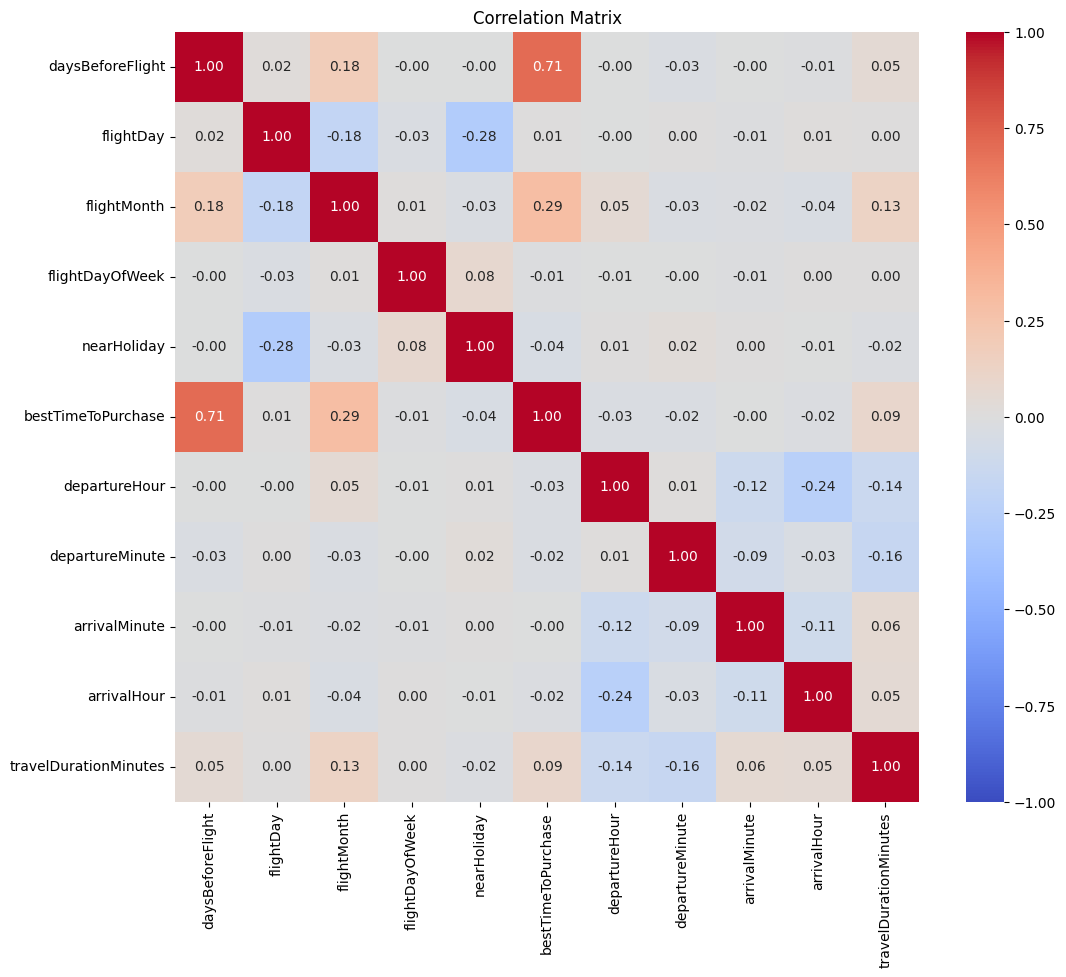

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [7]:

X = df_encoded.drop('bestTimeToPurchase', axis=1)
y = df_encoded['bestTimeToPurchase']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:


rf_regressor = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=False, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred_test = rf_regressor.predict(X_test)

y_pred_train = rf_regressor.predict(X_train)


rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE on Training Data: {rmse_train}")

RMSE on Test Data: 2.2287869274155785
RMSE on Training Data: 0.14799900924242335


10


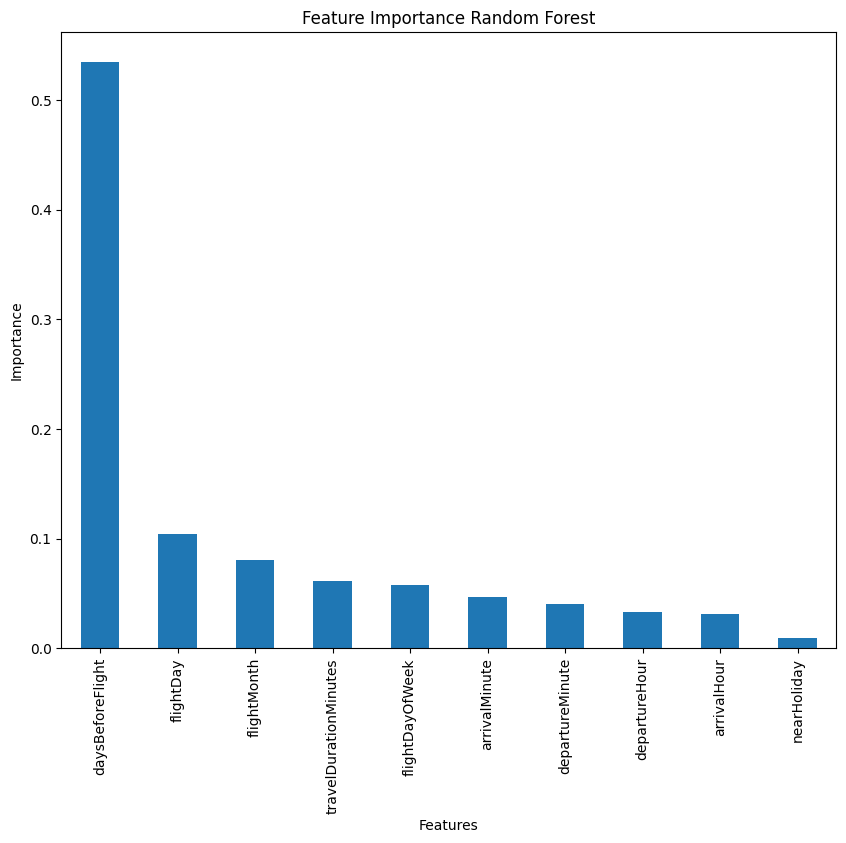

In [ ]:

feature_importances = rf_regressor.feature_importances_

features = pd.Series(feature_importances, index=X.columns)

plt.figure(figsize=(10, 8))
features.sort_values(ascending=False).nlargest(25).plot(kind='bar')
print(len(features))
plt.title('Feature Importance Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import pickle
from google.colab import files

file_path = '/content/drive/MyDrive/1_ord_lax_sorted_wDaysBeforeDeparture_bestTimePurchase_day_month_wDayOfWeek_wHolidays_wDurationMinutes_wCount_time_filterd_14_layovers.csv'

df = pd.read_csv(file_path)
print("Number of entries (rows):", df.shape[0])

columns_to_keep = [
    'daysBeforeFlight',
    'flightDay', 'flightMonth',
    'flightDayOfWeek', 'travelDurationMinutes', 'nearHoliday', 'bestTimeToPurchase',
    'departureHour', 'departureMinute', 'arrivalHour', 'arrivalMinute'
]

df_filtered = df[columns_to_keep]
df_encoded = df_filtered
print(df_encoded.head(10))

X = df_encoded.drop('bestTimeToPurchase', axis=1)
y = df_encoded['bestTimeToPurchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=2, max_depth=30, bootstrap=False, max_samples=None, random_state=42)

def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

custom_scorer = make_scorer(rmse_scorer, greater_is_better=False)

cv_scores = cross_val_score(rf_regressor, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring=custom_scorer)

rmse_scores = -cv_scores

print(f"Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Standard Deviation of RMSE: {np.std(rmse_scores)}")

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on Test Data: {rmse_test}")

# # Save the model to a pickle file
# model_file_path = '/content/drive/MyDrive/rf_regressor_model.pkl'
# with open(model_file_path, 'wb') as file:
#     pickle.dump(rf_regressor, file)

# print(f"Model saved to {model_file_path}")

# # Download the file
# files.download(model_file_path)


<ipython-input-3-3ce0aae2bc61>:12: DtypeWarning: Columns (15,17,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Number of entries (rows): 479857
   daysBeforeFlight  flightDay  flightMonth  flightDayOfWeek  \
0                26         18           10                1   
1                30         18           10                1   
2                31         18           10                1   
3                34         18           10                1   
4                35         18           10                1   
5                36         18           10                1   
6                37         18           10                1   
7                38         18           10                1   
8                39         18           10                1   
9                40         18           10                1   

   travelDurationMinutes  nearHoliday  bestTimeToPurchase  departureHour  \
0                  350.0        False                  26             14   
1                  350.0        False                  30             14   
2                  350.0        Fa

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Function to split the data into k folds
def split(X, y, folds, random_seed=42):
    np.random.seed(random_seed)
    indices = np.random.permutation(len(X))
    fold_size = len(X) // folds
    X_folds = []
    y_folds = []

    for i in range(folds):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        X_folds.append(X.iloc[test_indices])
        y_folds.append(y.iloc[test_indices])

    return X_folds, y_folds

# Function to combine the folds, excluding one fold as the test set
def combine(X_folds, y_folds, test_index):
    X_train = pd.concat([X_folds[i] for i in range(len(X_folds)) if i != test_index])
    y_train = pd.concat([y_folds[i] for i in range(len(y_folds)) if i != test_index])
    X_test = X_folds[test_index]
    y_test = y_folds[test_index]
    return X_train, X_test, y_train, y_test

file_path = '/content/drive/MyDrive/1_ord_lax_sorted_wDaysBeforeDeparture_bestTimePurchase_day_month_wDayOfWeek_wHolidays_wDurationMinutes_wCount_time_filterd_14_layovers.csv'
df = pd.read_csv(file_path)
print("Number of entries (rows):", df.shape[0])

columns_to_keep = [
    'daysBeforeFlight', 'flightDay', 'flightMonth',
    'flightDayOfWeek', 'travelDurationMinutes', 'nearHoliday', 'bestTimeToPurchase',
    'departureHour', 'departureMinute', 'arrivalHour', 'arrivalMinute'
]

df_filtered = df[columns_to_keep]
X = df_filtered.drop('bestTimeToPurchase', axis=1)
y = df_filtered['bestTimeToPurchase']

# Custom k-fold cross-validation
folds = 5
X_folds, y_folds = split(X, y, folds)
rmse_scores = []

for i in range(folds):
    X_train, X_test, y_train, y_test = combine(X_folds, y_folds, i)
    rf_regressor = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=2, max_depth=30, bootstrap=True, max_samples=0.9, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    print(f"Fold {i + 1}, RMSE: {rmse}")

print(f"Custom Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Standard Deviation of RMSE: {np.std(rmse_scores)}")


<ipython-input-3-828342cf8daf>:31: DtypeWarning: Columns (15,17,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Number of entries (rows): 479857
Fold 1, RMSE: 2.5220109846252257
Fold 2, RMSE: 2.4691281372667437
Fold 3, RMSE: 2.4509382111809215
Fold 4, RMSE: 2.467151124681312
Fold 5, RMSE: 2.440602522489089
Custom Cross-Validation RMSE Scores: [2.5220109846252257, 2.4691281372667437, 2.4509382111809215, 2.467151124681312, 2.440602522489089]
Mean RMSE: 2.4699661960486585
Standard Deviation of RMSE: 0.028076953254741025


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Load the dataset
file_path = '/content/drive/MyDrive/1_ord_lax_sorted_wDaysBeforeDeparture_bestTimePurchase_day_month_wDayOfWeek_wHolidays_wDurationMinutes_wCount_time_filterd_14_layovers.csv'
df = pd.read_csv(file_path)
print("Number of entries (rows):", df.shape[0])

columns_to_keep = [
    'daysBeforeFlight', 'flightDay', 'flightMonth',
    'flightDayOfWeek', 'travelDurationMinutes', 'nearHoliday', 'bestTimeToPurchase',
    'departureHour', 'departureMinute', 'arrivalHour', 'arrivalMinute'
]

df_filtered = df[columns_to_keep]
X = df_filtered.drop('bestTimeToPurchase', axis=1)
y = df_filtered['bestTimeToPurchase']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

# KFold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_regressor = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=2, max_depth=30, bootstrap=False, max_samples=None, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    print(f"Fold RMSE: {rmse}")

print(f"KFold Cross-Validation RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Standard Deviation of RMSE: {np.std(rmse_scores)}")


<ipython-input-2-627801f34de6>:9: DtypeWarning: Columns (15,17,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Number of entries (rows): 479857
Fold RMSE: 2.212599797586592
Fold RMSE: 2.1789668614026634
Fold RMSE: 2.1927983066483496
Fold RMSE: 2.18993147316882
Fold RMSE: 2.220721266306037
KFold Cross-Validation RMSE Scores: [2.212599797586592, 2.1789668614026634, 2.1927983066483496, 2.18993147316882, 2.220721266306037]
Mean RMSE: 2.199003541022492
Standard Deviation of RMSE: 0.015354436902834796
